In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import utils
import plotting_tools as pt

from importlib import reload
import utils
utils = reload(utils)
pt = reload(pt)

import h5py

In [6]:
Nx, Ny = 100, 50
et = 10.0

def load(Nx,Ny,et):
    base_fn = 'output_rising_bubble'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

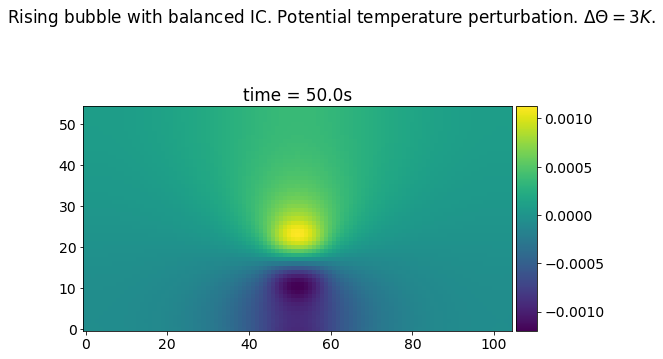

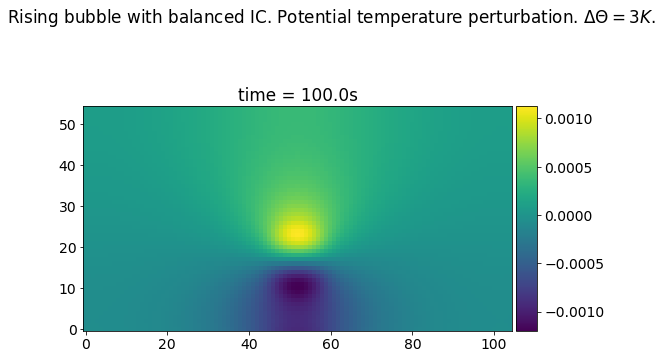

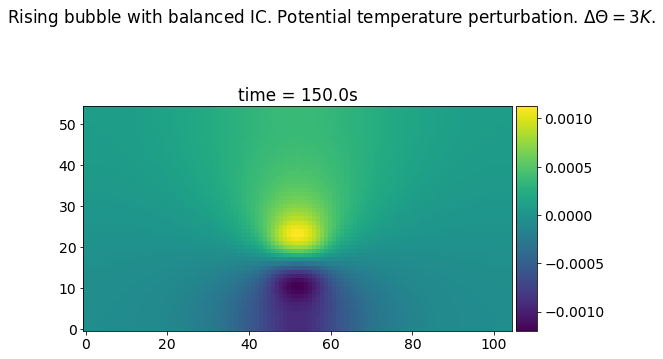

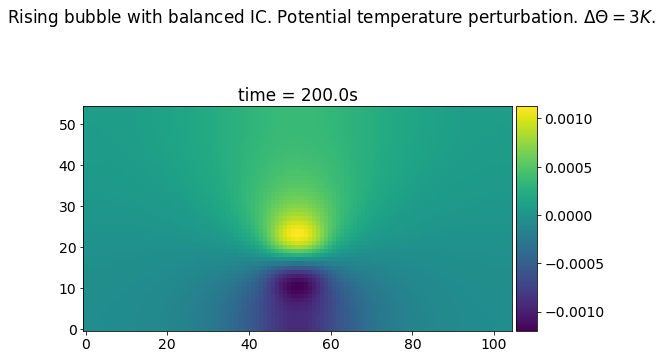

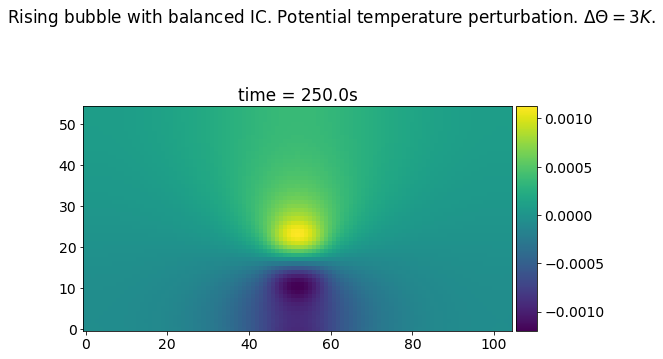

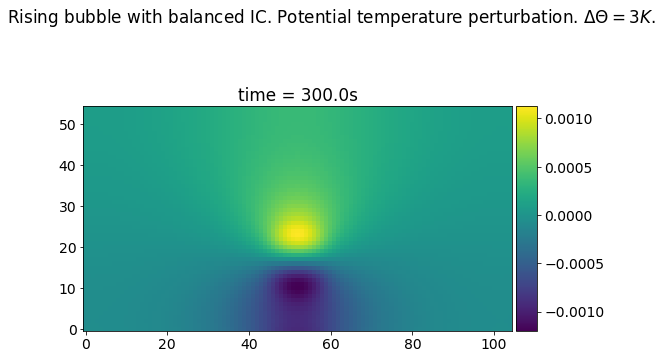

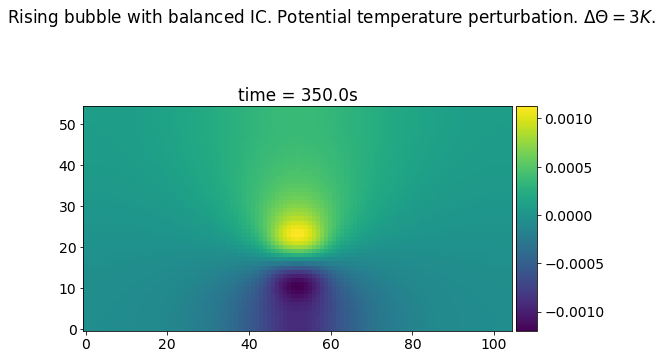

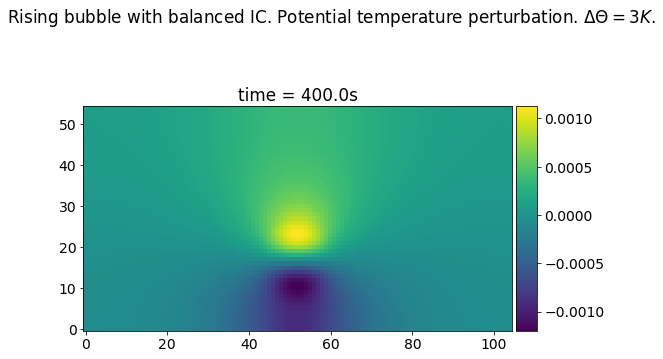

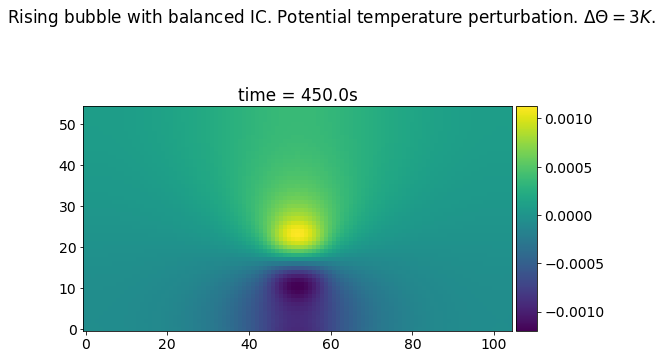

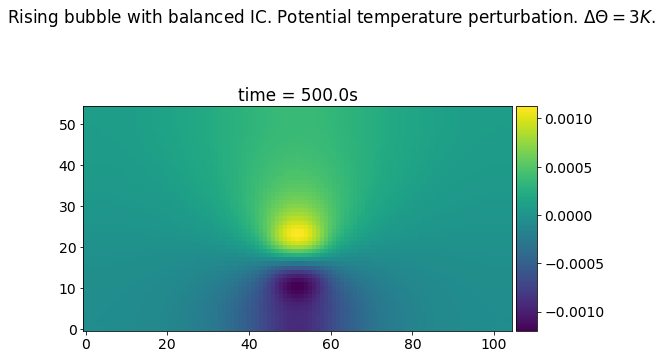

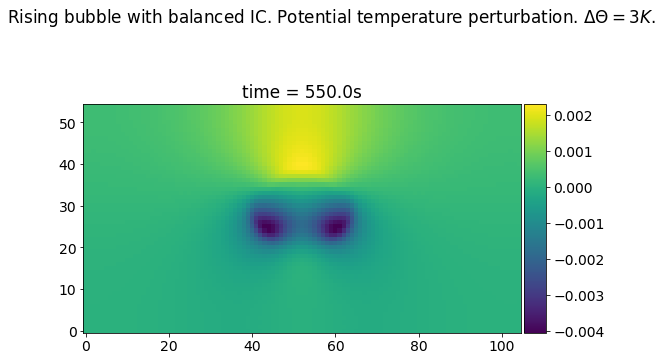

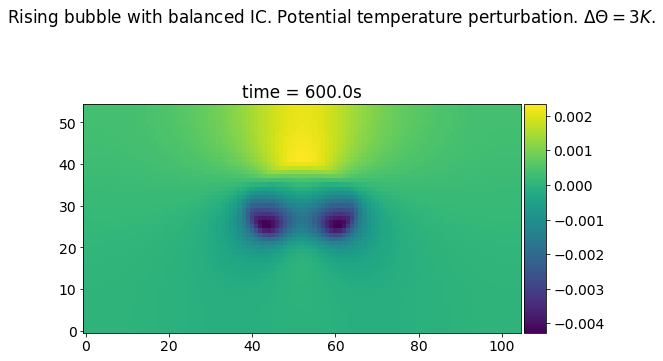

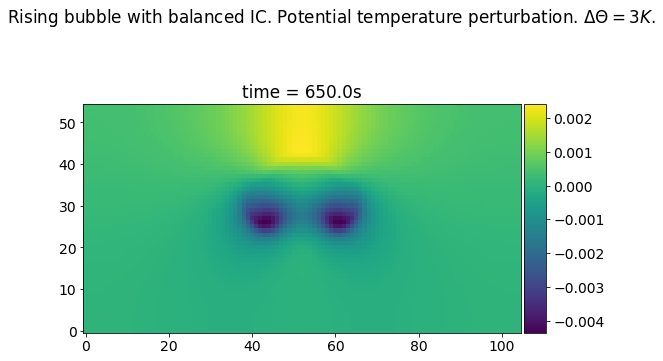

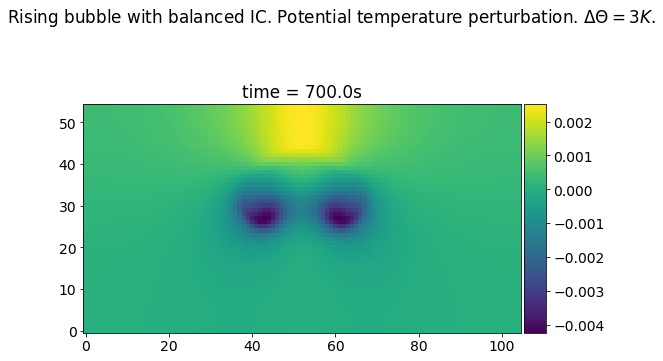

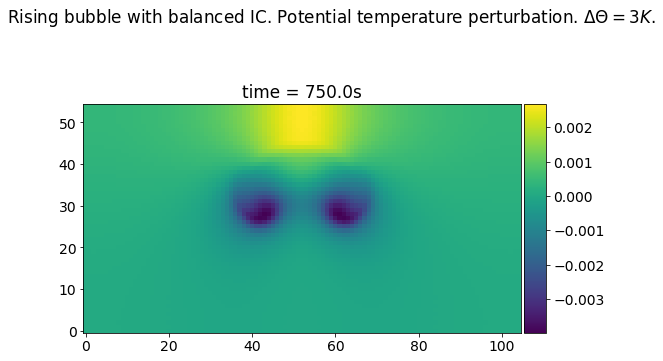

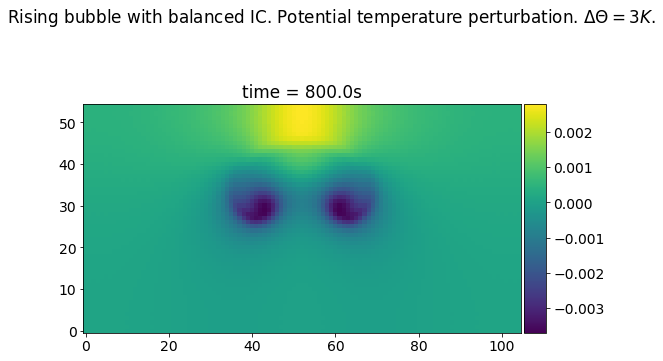

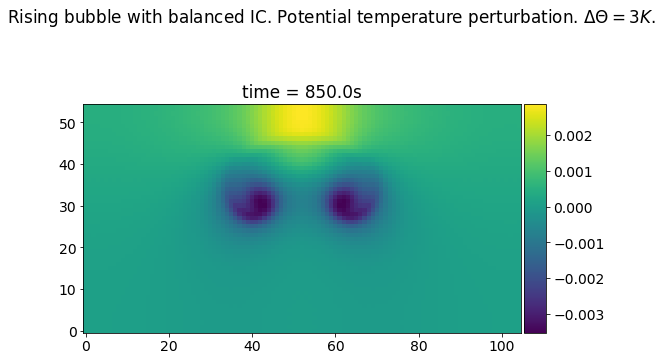

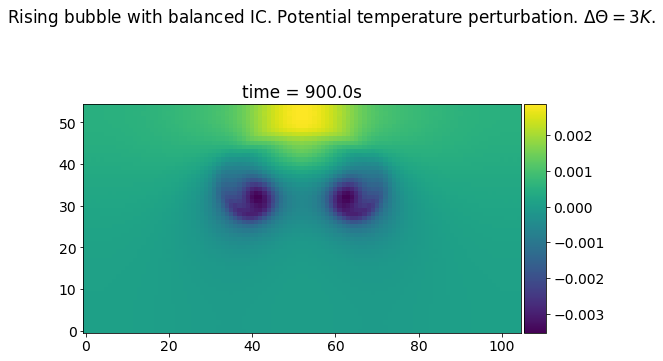

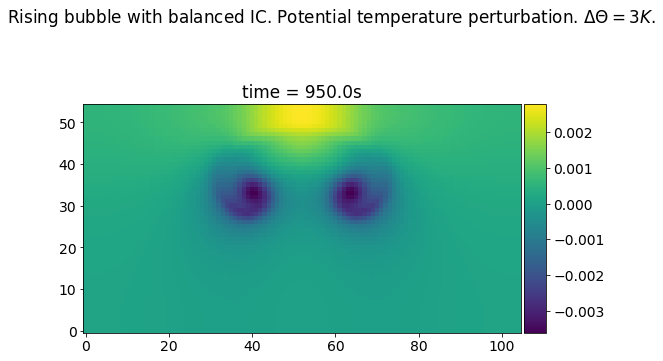

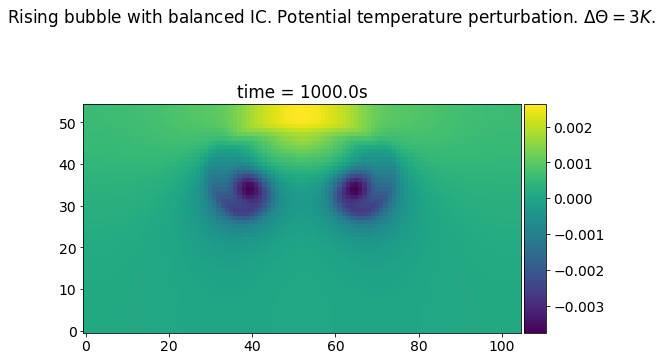

In [28]:
N = 1
time = 0.0

sfx = 'psinc_ref'
times = np.arange(0.05,10.05,0.05)

attributes = ['rho','rhou','rhov','rhoY','p2_nodes']
tag = tags[9]
t_lbl = 'TIME'

fn = tc.get_filename(N,sfx)
path = tc.get_path(fn)

class oo(object):
    def __init__(self):
        None
        
oo_debug = oo()
oo_tfreeze = oo()

debug = True
fs = (8,6)

for tt,time in enumerate(times):
    arr_lst = []
    for atr_idx, attribute in enumerate(attributes):
        
        if time == 0.05:
            arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=False, avg=False)[0]
            setattr(oo_tfreeze,attribute,arr)
            
        if time > 5.0:
            arr = tc.get_arr(path, time, N, attribute, label_type=t_lbl, tag=tag, inner=False, avg=False)[0]
        else:
            arr = getattr(oo_tfreeze,attribute)
#         
#         print(arr.shape)
    
#         if time == 5.0:
#             setattr(oo_tfreeze,attribute,arr)

        if debug is True:
            arr = arr.T

            setattr(oo_debug,attribute,arr)

        if debug is False:
            file = h5py.File("output_rising_bubble_ensemble=%i_%i_%i_%.1f_truthgen_freezelt5.h5" %(N,Nx,Ny,et))
            name = "ensemble_mem=0_%.3f_after_full_step" %times[tt]
            file.create_dataset(str(attribute) + '/' + str(attribute) + '_' + str(name), data=arr, chunks=True, compression='gzip', compression_opts=4, dtype=np.float32)
            file.close()
            
    if debug == True:
        if (tt+1) % 10 == 0:
#             arr_lst.append([oo_debug.rhoY / oo_debug.rho,"time = %.1fs" %(time*100)])
            arr_lst.append([oo_debug.p2_nodes,"time = %.1fs" %(time*100)])

            pl = pt.plotter(arr_lst,ncols=1,figsize=fs,sharey=False)
            _ = pl.plot(aspect='equal',method='imshow',suptitle=st)